<a href="https://colab.research.google.com/github/gigigilt/py_quest/blob/main/%ED%86%B5%EA%B3%842_%ED%80%98%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ‚úîÔ∏è ÎÇòÎàîÍ≥†Îîï ÏÑ§Ïπò
!apt-get -qq install -y fonts-nanum

# ‚úîÔ∏è matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')         # ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Î°ú ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus'] = False   # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

In [3]:
#ÎØ∏ÏÖò1 ÍµêÏú°ÌîÑÎ°úÍ∑∏Îû®Ïùò ÌïôÏäµÌö®Í≥º Î∂ÑÏÑù Î≥¥Í≥†ÏÑú
np.random.seed(321)
n_students = 150
control_scores = np.random.normal(65, 10, n_students)
smartlearn_scores = np.random.normal(70, 12, n_students)
education_data = pd.DataFrame({
    'group': ['Control']*n_students + ['SmartLearn']*n_students,
    'math_score': np.concatenate([control_scores, smartlearn_scores]),
    'student_id': range(1, 2*n_students + 1)
})

print("üìö ÍµêÏú° ÌîÑÎ°úÍ∑∏Îû® Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(education_data.groupby('group')['math_score'].agg(['count', 'mean', 'std']).round(2))

üìö ÍµêÏú° ÌîÑÎ°úÍ∑∏Îû® Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
            count   mean    std
group                          
Control       150  64.93   9.67
SmartLearn    150  70.47  11.29


In [4]:
#1-1 Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ÎπÑÍµê
control_mean = control_scores.mean()
smartlearn_mean = smartlearn_scores.mean()
control_se = control_scores.std()/np.sqrt(n_students)
smartlearn_se = smartlearn_scores.std()/np.sqrt(n_students)

print(f"ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: {control_mean:.2f} ¬± {control_se:.2f}")
print(f"SmartLearn ÏàòÌïô Ï†êÏàò: {smartlearn_mean:.2f} ¬± {smartlearn_se:.2f}")

ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: 64.93 ¬± 0.79
SmartLearn ÏàòÌïô Ï†êÏàò: 70.47 ¬± 0.92


In [5]:
#1-2 ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù
from scipy.stats import ttest_ind
control_group = education_data[education_data['group'] == 'Control']['math_score']
smartlearn_group = education_data[education_data['group'] == 'SmartLearn']['math_score']
t_stat, p_value = ttest_ind(smartlearn_group, control_group, equal_var=False)

print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("‚úÖ SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞Í≥º Ïú†ÏùòÎØ∏Ìïú ÏÑ±Ï†Å Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§!")
else:
    print("‚ùå SmartLearn ÌîÑÎ°úÍ∑∏Îû®Ïùò Ìö®Í≥ºÍ∞Ä Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

t-ÌÜµÍ≥ÑÎüâ: 4.565
p-value: 0.0000
‚úÖ SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞Í≥º Ïú†ÏùòÎØ∏Ìïú ÏÑ±Ï†Å Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§!


In [6]:
#1-3 Ìö®Í≥º ÌÅ¨Í∏∞ ÎπÑÍµê
control_std = education_data[education_data['group'] == 'Control']['math_score'].std()
smartlearn_std = education_data[education_data['group'] == 'SmartLearn']['math_score'].std()
pooled_std = np.sqrt(((n_students-1)*control_std**2 + (n_students-1)*smartlearn_std**2)/(2*n_students-2))
cohens_d = (smartlearn_mean - control_mean) / pooled_std

print(f"Cohen's d: {cohens_d:.3f}")
if cohens_d > 0.8:
    print("‚Üí ÌÅ∞ Ìö®Í≥ºÌÅ¨Í∏∞ (ÌïôÎ∂ÄÎ™®Í∞Ä Î™ÖÌôïÌûà Ï≤¥Í∞êÌï† Ïàò ÏûàÎäî ÏàòÏ§Ä)")
elif cohens_d > 0.5:
    print("‚Üí Ï§ëÍ∞Ñ Ìö®Í≥ºÌÅ¨Í∏∞ (ÍµêÏú°Ï†ÅÏúºÎ°ú ÏùòÎØ∏ÏûàÎäî ÏàòÏ§Ä)")
else:
    print("‚Üí ÏûëÏùÄ Ìö®Í≥ºÌÅ¨Í∏∞ (ÎØ∏ÎØ∏Ìïú Í∞úÏÑ† ÏàòÏ§Ä)")


Cohen's d: 0.527
‚Üí Ï§ëÍ∞Ñ Ìö®Í≥ºÌÅ¨Í∏∞ (ÍµêÏú°Ï†ÅÏúºÎ°ú ÏùòÎØ∏ÏûàÎäî ÏàòÏ§Ä)


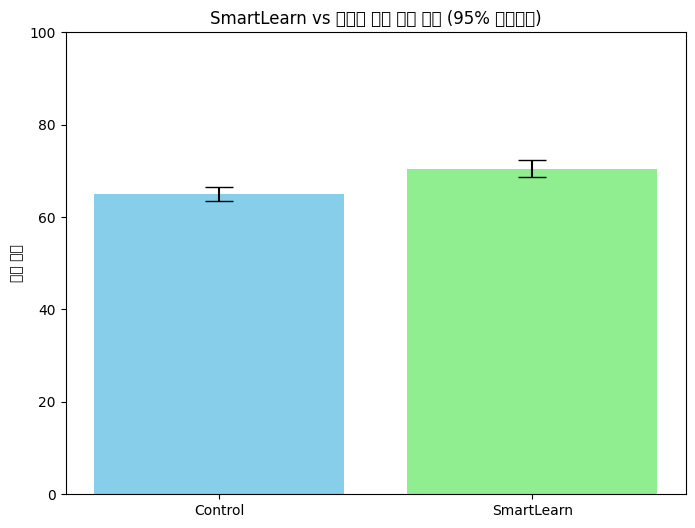

In [7]:
#1-4 Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
groups = ['Control', 'SmartLearn']
means = [control_mean, smartlearn_mean]
errors = [1.96 * control_se, 1.96 * smartlearn_se]
plt.bar(x=groups,height=means, yerr=errors,
    capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('ÏàòÌïô Ï†êÏàò')
plt.title('SmartLearn vs ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò ÎπÑÍµê (95% Ïã†Î¢∞Íµ¨Í∞Ñ)')
plt.ylim(0, 100)
plt.show()

1-5
üìã p-Ìï¥ÌÇπ Î∞©ÏßÄ Î∞©Ïïà
1. ÏÇ¨Ï†Ñ Îì±Î°ù: Ïó∞Íµ¨ Í≥ÑÌöçÏùÑ Open Science Framework(OSF)Ïóê Îì±Î°ùÌïòÏó¨ Î∂ÑÏÑù Í≥ÑÌöçÏùÑ Ìà¨Î™ÖÌïòÍ≤å Í≥µÍ∞ú.
2. Îã§Ï§ëÎπÑÍµê Î≥¥Ï†ï: Bonferroni ÎòêÎäî FDR Î∞©Î≤ïÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îã§Ï§ë Í≤ÄÏ†ïÏúºÎ°ú Ïù∏Ìïú Ïò§Î•òÎ•º ÏµúÏÜåÌôî.
3. p-Ìï¥ÌÇπÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú Ï∂îÍ∞Ä Î∞©ÏïàÏùÑ Ï†úÏïàÌïòÏÑ∏Ïöî :

  Ìö®Í≥º ÌÅ¨Í∏∞ Í∏∞Ï§ÄÏùÑ ÏÇ¨Ï†Ñ ÏÑ§Ï†ïÌï¥ p-value Í≥ºÏûâ ÏùòÏ°¥ÎèÑ Í∞êÏÜå, ÎèÖÎ¶ΩÏ†Å Îç∞Ïù¥ÌÑ∞ Ïû¨Í≤ÄÏ¶ùÏúºÎ°ú Í≤∞Í≥ºÏùò Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± Î∞è Ïã†Î¢∞ÎèÑ Í∞ïÌôî,\
  Î∏îÎùºÏù∏Îìú Î∂ÑÏÑù Í∏∞Î≤ïÏúºÎ°ú Î∂ÑÏÑù ÏÑ§Í≥ÑÏùò Í∞ùÍ¥ÄÏÑ± ÌôïÎ≥¥, Ï†ÑÏàò Î≥¥Í≥†Î°ú Ïó∞Íµ¨Ïùò Ìà¨Î™ÖÏÑ± Î∞è Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπ

In [8]:
#1-6 Î≤†Ïù¥Ï¶à Ïù∏Ïàò
# Î≤†Ïù¥Ï¶à Ïù∏Ïàò Í≥ÑÏÇ∞ (BIC Í∏∞Î∞ò Í∑ºÏÇ¨)
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1): SmartLearn Ìö®Í≥º ÏûàÏùå vs Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0): Ìö®Í≥º ÏóÜÏùå
n_total = 2 * n_students
bic_diff = t_stat**2 - np.log(n_total)
bf_10 = np.exp(bic_diff / 2)

print(f"Î≤†Ïù¥Ï¶à Ïù∏Ïàò (BF‚ÇÅ‚ÇÄ): {bf_10:.2f}")
if bf_10 > 10:
    print("‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ ÌôïÏã§)")
elif bf_10 > 3:
    print("‚Üí Ï§ëÍ∞Ñ Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ± ÎÜíÏùå)")
elif bf_10 > 1:
    print("‚Üí ÏïΩÌïú Ï¶ùÍ±∞ (H1 ÏïΩÍ∞Ñ ÏßÄÏßÄ)")
elif bf_10 > 0.33:
    print("‚Üí Î∂àÎ∂ÑÎ™ÖÌïú Ï¶ùÍ±∞ (Í≤∞Î°† ÎÇ¥Î¶¨Í∏∞ Ïñ¥Î†§ÏõÄ)")
elif bf_10 > 0.1:
    print("‚Üí Ï§ëÍ∞Ñ Ï¶ùÍ±∞ (H0 ÏßÄÏßÄ: SmartLearn Ìö®Í≥º ÏùòÏã¨Ïä§Îü¨ÏõÄ)")
else:
    print("‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H0 ÏßÄÏßÄ: SmartLearn Ìö®Í≥º ÏóÜÏùå)")

Î≤†Ïù¥Ï¶à Ïù∏Ïàò (BF‚ÇÅ‚ÇÄ): 1934.97
‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ ÌôïÏã§)


In [9]:
#1-7üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: SmartLearn ÌîÑÎ°úÍ∑∏Îû® Ìö®Í≥º Í≤ÄÏ¶ù
print('==================================================')
print('üéØ', 'ÌïµÏã¨ Í≤∞Í≥º')
print(f"‚Ä¢ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: {control_mean:.2f} ¬± {control_se:.2f}")
print(f"‚Ä¢SmartLearn ÏàòÌïô Ï†êÏàò: {smartlearn_mean:.2f} ¬± {smartlearn_se:.2f}")
print(f"‚Ä¢ Ï†êÏàò Ìñ•ÏÉÅ: {(smartlearn_mean - control_mean):.2f}Ï†ê (ÏïΩ {(100 * (smartlearn_mean - control_mean) / control_mean):.1f}% Ìñ•ÏÉÅ)")
print(f"‚Ä¢ Ìö®Í≥ºÌÅ¨Í∏∞ (Cohen's d): {cohens_d:.2f}")
print(f"‚Ä¢ p-value: {p_value:.4f}")
print(f"‚Ä¢ Î≤†Ïù¥Ï¶à Ïù∏Ïàò: {bf_10:.2f}")

print('üí°',' ÎπÑÏ¶àÎãàÏä§ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠:')
print(f'''SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞ ÎåÄÎπÑ ÌèâÍ∑† {(smartlearn_mean - control_mean):.2f}Ï†ê(ÏïΩ {(100 * (smartlearn_mean - control_mean) / control_mean):.1f}%)Ïùò ÏàòÌïô ÏÑ±Ï†Å Ìñ•ÏÉÅÏùÑ Î≥¥ÏòÄÏúºÎ©∞,
ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥º(p = {p_value:.4f}, Cohen‚Äôs d = {cohens_d:.2f}, BF‚ÇÅ‚ÇÄ = {bf_10:.2f})Í∞Ä ÎèÑÏ∂úÎêòÏóàÏäµÎãàÎã§.

Ïù¥Îäî ÍµêÏú°Ï†ÅÏúºÎ°ú Ï§ëÍ∞Ñ Ïù¥ÏÉÅÏùò Ìö®Í≥ºÎ•º ÏãúÏÇ¨ÌïòÎ©∞, ÎßàÏºÄÌåÖ Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖòÏóêÏÑú 'Í∞ùÍ¥ÄÏ†Å ÏÑ±Í≥º Í≤ÄÏ¶ù ÏôÑÎ£å'Î•º Í∞ïÏ°∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
Ï°∞Í∏∞ ÏÉÅÏö©ÌôîÎ•º Í≥†Î†§Ìï† Ïàò ÏûàÏúºÎ©∞, ÏßÄÏûêÏ≤¥¬∑ÍµêÏú°Ï≤≠ Îã®ÏúÑÏùò ÏãúÎ≤î ÏÇ¨ÏóÖÏùÑ ÌÜµÌï¥ Ï†ÑÍµ≠ ÌôïÏÇ∞ Í∏∞Î∞òÏùÑ ÎßàÎ†®Ìï† Í≤ÉÏùÑ Í∂åÏû•Ìï©ÎãàÎã§.

ÎßàÏºÄÌåÖ Ï†ÑÎûµÏúºÎ°ú "Í≤ÄÏ¶ùÎêú ÏÑ±Ï†Å Ìñ•ÏÉÅ Ìö®Í≥º" Î©îÏãúÏßÄÎ•º Ï†ÑÎ©¥Ïóê ÎÇ¥ÏÑ∏Ïö¥ ÏΩòÌÖêÏ∏† ÎßàÏºÄÌåÖ Ï†ÑÍ∞ú, ÎåÄÌëú ÌïôÎ∂ÄÎ™® ÎåÄÏÉÅ ÏÇ¨Ïö© ÌõÑÍ∏∞ ÏòÅÏÉÅ Ï†úÏûë Î∞è SNS Ï§ëÏã¨ ÏÑ±Í≥º Ï§ëÏã¨ Î∞îÏù¥Îü¥ Ï∫†ÌéòÏù∏ Ï†ÑÍ∞ú,
Ìö®Í≥º Í≤ÄÏ¶ù Í≤∞Í≥ºÎ•º Îã¥ÏùÄ ÏöîÏïΩ Ïù∏Ìè¨Í∑∏ÎûòÌîΩ ÌòïÌÉúÎ°ú Î∏îÎ°úÍ∑∏/Ïú†ÌäúÎ∏å/Îâ¥Ïä§Î†àÌÑ∞ Îì±Ïóê Î∞∞Ìè¨,  2Ï£º Ï≤¥Ìóò ÌîÑÎ°úÍ∑∏Îû®ÏúºÎ°ú ÏûÖÏÜåÎ¨∏ÏùÑ Ïú†ÎèÑÌïòÎäî Î∞©ÏïàÏùÑ Ï†úÏïàÌï©ÎãàÎã§.

Ìà¨Ïûê Ï†ÑÎûµÏúºÎ°úÎäî Ï†úÌíàÏù¥ Ïù¥ÎØ∏ ÏãúÏû•ÏÑ± Í≤ÄÏ¶ù(Proof of Value)ÏùÑ ÎßàÏ≥§ÏúºÎØÄÎ°ú, ÌôïÏÇ∞ Ï§ëÏã¨Ïùò ÎßàÏºÄÌåÖ Ìà¨Ïûê ÏßëÏ§ë Ï†ÑÎûµ Ï∂îÏ≤ú,
ÏãúÎ≤î ÎèÑÏûÖ ÏßÄÏó≠Ïùò ÌïôÍµê/ÌïôÏõêÍ≥º ÌòëÏïΩÏùÑ Îß∫Ïñ¥, B2B Í≥ÑÏïΩ Íµ¨Ï°∞ Ï†ïÏ∞©,ÌõÑÏÜç Í∞úÎ∞ú(Ïòà: ÌÉÄÍ≥ºÎ™© ÌôïÏû•, ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÎßûÏ∂§ ÏïåÍ≥†Î¶¨Ï¶ò) Î∞è ÏÑ±Í≥º Í∏∞Î∞ò Î≥¥ÏÉÅ Î™®Îç∏ Íµ¨Ï∂ïÏóê R&D ÏòàÏÇ∞ Ïö∞ÏÑ† Î∞∞Ï†ïÏùÑ Ï†úÏïàÌïòÎ©∞,

Ï†ïÏ±Ö Î∞è ÍµêÏú°Î∂Ä ÎåÄÏùëÏúºÎ°úÎäî Ìö®Í≥º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÍµêÏú°Î∂Ä ÏÇ∞Ìïò Í≥µÍ≥µ ÌîåÎû´Ìèº ÌÉëÏû¨ Ïã†Ï≤≠ Í∞ÄÎä•ÏÑ± Í≤ÄÌÜ†, ÏßÄÏó≠ ÍµêÏú°Ï≤≠ ÎåÄÏÉÅ ÏÑ§Î™ÖÌöå Í∞úÏµúÎ°ú
ÍµêÏú°Í≤©Ï∞® Ìï¥ÏÜå, ÌïôÏäµ ÎπàÍ≥§Ï∏µ ÏßÄÏõêÏù¥ÎùºÎäî Ï†ïÏ±Ö Î™©Ï†ÅÍ≥º Ïó∞Í≥ÑÌïòÏó¨ ÏÇ¨ÌöåÏ†Å Í∞ÄÏπò Í∏∞Î∞ò Î∏åÎûúÎî© Í∞ïÌôîÎ•º Ï∂îÏ≤úÌï©ÎãàÎã§.''')

print('‚ö†Ô∏è',' Î¶¨Ïä§ÌÅ¨ Î∞è Ï†úÌïúÏÇ¨Ìï≠:')
print('''‚Ä¢ ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞òÏù¥Î©∞, Ïã§Ï†ú ÏßÄÏó≠¬∑ÌïôÍµê ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í≤∞Í≥º Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.
‚Ä¢ Ïû•Í∏∞Ï†ÅÏù∏ ÏßÄÏÜç Ìö®Í≥ºÏôÄ Îã§Î•∏ Í≥ºÎ™©Ïóê ÎåÄÌïú ÌååÍ∏â Ìö®Í≥ºÎäî ÏïÑÏßÅ Í≤ÄÏ¶ùÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.
‚Ä¢ Ïù∏ÏßÄ Ïô∏ ÏöîÏÜå(ÌïôÏäµ ÌÉúÎèÑ, ÎèôÍ∏∞, Ï†ïÏÑúÏ†Å Î≥ÄÌôî Îì±)Îäî Î∂ÑÏÑù Î≤îÏúÑÏóêÏÑú Ï†úÏô∏ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.''')

üéØ ÌïµÏã¨ Í≤∞Í≥º
‚Ä¢ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: 64.93 ¬± 0.79
‚Ä¢SmartLearn ÏàòÌïô Ï†êÏàò: 70.47 ¬± 0.92
‚Ä¢ Ï†êÏàò Ìñ•ÏÉÅ: 5.54Ï†ê (ÏïΩ 8.5% Ìñ•ÏÉÅ)
‚Ä¢ Ìö®Í≥ºÌÅ¨Í∏∞ (Cohen's d): 0.53
‚Ä¢ p-value: 0.0000
‚Ä¢ Î≤†Ïù¥Ï¶à Ïù∏Ïàò: 1934.97
üí°  ÎπÑÏ¶àÎãàÏä§ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠:
SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞ ÎåÄÎπÑ ÌèâÍ∑† 5.54Ï†ê(ÏïΩ 8.5%)Ïùò ÏàòÌïô ÏÑ±Ï†Å Ìñ•ÏÉÅÏùÑ Î≥¥ÏòÄÏúºÎ©∞,
ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥º(p = 0.0000, Cohen‚Äôs d = 0.53, BF‚ÇÅ‚ÇÄ = 1934.97)Í∞Ä ÎèÑÏ∂úÎêòÏóàÏäµÎãàÎã§.

Ïù¥Îäî ÍµêÏú°Ï†ÅÏúºÎ°ú Ï§ëÍ∞Ñ Ïù¥ÏÉÅÏùò Ìö®Í≥ºÎ•º ÏãúÏÇ¨ÌïòÎ©∞, ÎßàÏºÄÌåÖ Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖòÏóêÏÑú 'Í∞ùÍ¥ÄÏ†Å ÏÑ±Í≥º Í≤ÄÏ¶ù ÏôÑÎ£å'Î•º Í∞ïÏ°∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
Ï°∞Í∏∞ ÏÉÅÏö©ÌôîÎ•º Í≥†Î†§Ìï† Ïàò ÏûàÏúºÎ©∞, ÏßÄÏûêÏ≤¥¬∑ÍµêÏú°Ï≤≠ Îã®ÏúÑÏùò ÏãúÎ≤î ÏÇ¨ÏóÖÏùÑ ÌÜµÌï¥ Ï†ÑÍµ≠ ÌôïÏÇ∞ Í∏∞Î∞òÏùÑ ÎßàÎ†®Ìï† Í≤ÉÏùÑ Í∂åÏû•Ìï©ÎãàÎã§.

ÎßàÏºÄÌåÖ Ï†ÑÎûµÏúºÎ°ú "Í≤ÄÏ¶ùÎêú ÏÑ±Ï†Å Ìñ•ÏÉÅ Ìö®Í≥º" Î©îÏãúÏßÄÎ•º Ï†ÑÎ©¥Ïóê ÎÇ¥ÏÑ∏Ïö¥ ÏΩòÌÖêÏ∏† ÎßàÏºÄÌåÖ Ï†ÑÍ∞ú, ÎåÄÌëú ÌïôÎ∂ÄÎ™® ÎåÄÏÉÅ ÏÇ¨Ïö© ÌõÑÍ∏∞ ÏòÅÏÉÅ Ï†úÏûë Î∞è SN

In [10]:
#ÎØ∏ÏÖò2 ÎßàÏºÄÌåÖÌö®Í≥º Ï∫†ÌéòÏù∏ Î∂ÑÏÑù Î≥¥Í≥†ÏÑú
np.random.seed(456)
n_customers = 1000
ad_exposure = np.random.binomial(1, 0.6, n_customers)
ages = np.random.randint(20, 60, n_customers)
income = np.random.lognormal(np.log(50000), 0.4, n_customers)
purchase_amount = 100 + 50*ad_exposure + 0.5*ages + 0.0001*income + np.random.normal(0, 20, n_customers)
data_marketing = pd.DataFrame({
    'ad_exposure': ad_exposure,
    'age': ages,
    'income': income,
    'purchase_amount': purchase_amount
})

print("üì¢ ÎßàÏºÄÌåÖ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(data_marketing.groupby('ad_exposure')['purchase_amount'].agg(['count', 'mean', 'std']).round(2))

üì¢ ÎßàÏºÄÌåÖ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
             count    mean    std
ad_exposure                      
0              386  124.60  22.35
1              614  175.32  21.69


üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§
                 ad_exposure    age  income  purchase_amount
ad_exposure            1.000  0.018  -0.050            0.748
age                    0.018  1.000  -0.034            0.203
income                -0.050 -0.034   1.000            0.046
purchase_amount        0.748  0.203   0.046            1.000


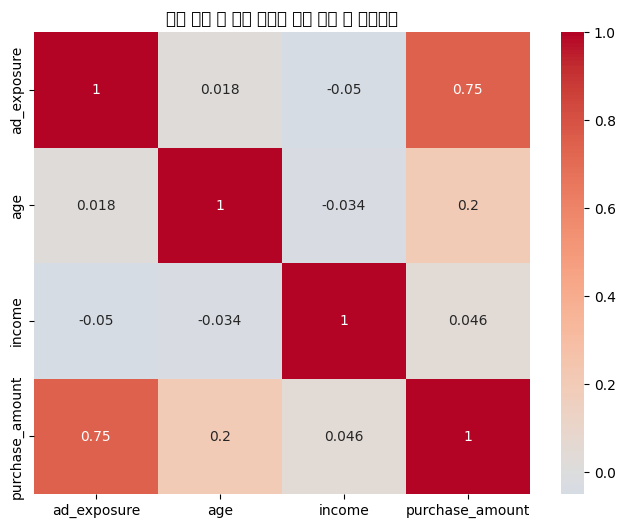

In [11]:
#2-1 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌÉêÏÉâ
correlation_matrix = data_marketing.corr()
print("üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§")
print(correlation_matrix.round(3))

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Í≥†Í∞ù ÌäπÏÑ± Î∞è Í¥ëÍ≥† ÎÖ∏Ï∂úÍ≥º Íµ¨Îß§ Í∏àÏï° Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.show()

In [12]:
#2-2 Îã®ÏàúÎπÑÍµêÏôÄ ÌïúÍ≥Ñ
exposed_mean = data_marketing[data_marketing['ad_exposure']==1]['purchase_amount'].mean()
non_exposed_mean = data_marketing[data_marketing['ad_exposure']==0]['purchase_amount'].mean()
simple_difference = exposed_mean - non_exposed_mean

print(f"Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: {exposed_mean:.2f}Ïõê")
print(f"Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: {non_exposed_mean:.2f}Ïõê")
print(f"Îã®Ïàú Ï∞®Ïù¥: {simple_difference:.2f}Ïõê")
print("‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠: Ïó∞Î†π, ÏÜåÎìù Îì±Ïùò Ï§ëÏ≤©ÏöîÏù∏ÏùÑ ÌÜµÏ†úÌïòÏßÄ ÏïäÏïÑ Í¥ëÍ≥†Ïùò ÏàúÏàòÌïú Ìö®Í≥ºÎ•º Ï†ïÌôïÌûà Ï∏°Ï†ïÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ")
print("   ‚Üí Ïòà: Í≥†ÏÜåÎìùÏ∏µÏóêÍ≤å Í¥ëÍ≥†Í∞Ä Îçî ÎßéÏù¥ ÎÖ∏Ï∂úÎêòÏóàÎã§Î©¥ Ï∞®Ïù¥Í∞Ä Í≥ºÎåÄÌèâÍ∞ÄÎê† Ïàò ÏûàÏùå")

Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: 175.32Ïõê
Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: 124.60Ïõê
Îã®Ïàú Ï∞®Ïù¥: 50.72Ïõê
‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠: Ïó∞Î†π, ÏÜåÎìù Îì±Ïùò Ï§ëÏ≤©ÏöîÏù∏ÏùÑ ÌÜµÏ†úÌïòÏßÄ ÏïäÏïÑ Í¥ëÍ≥†Ïùò ÏàúÏàòÌïú Ìö®Í≥ºÎ•º Ï†ïÌôïÌûà Ï∏°Ï†ïÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ
   ‚Üí Ïòà: Í≥†ÏÜåÎìùÏ∏µÏóêÍ≤å Í¥ëÍ≥†Í∞Ä Îçî ÎßéÏù¥ ÎÖ∏Ï∂úÎêòÏóàÎã§Î©¥ Ï∞®Ïù¥Í∞Ä Í≥ºÎåÄÌèâÍ∞ÄÎê† Ïàò ÏûàÏùå


In [13]:
#2-3 Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù
X = data_marketing[['ad_exposure', 'age', 'income']]
y = data_marketing['purchase_amount']
model = LinearRegression()
model.fit(X,y)

coeffs = pd.DataFrame({
    'Î≥ÄÏàò': ['Í¥ëÍ≥† ÎÖ∏Ï∂ú', 'Ïó∞Î†π', 'ÏÜåÎìù'],
    'Í≥ÑÏàò': model.coef_,
    'Ìï¥ÏÑù': ['Í¥ëÍ≥† ÎÖ∏Ï∂úÏãú Íµ¨Îß§Ïï° Ï¶ùÍ∞Ä', 'Ïó∞Î†π 1ÏÑ∏ Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî', 'ÏÜåÎìù 1Ïõê Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî']
})
print("üìä ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º")
print(coeffs.round(3))
ad_effect = coeffs.loc[coeffs['Î≥ÄÏàò'] == 'Í¥ëÍ≥† ÎÖ∏Ï∂ú', 'Í≥ÑÏàò'].values[0]
print(f"\nüéØ ÌïµÏã¨ Í≤∞Í≥º: Í¥ëÍ≥† Ìö®Í≥º = {ad_effect:.2f}Ïõê (Îã§Î•∏ Ï°∞Í±¥Ïù¥ ÎèôÏùºÌï† Îïå)")

üìä ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º
      Î≥ÄÏàò      Í≥ÑÏàò                Ìï¥ÏÑù
0  Í¥ëÍ≥† ÎÖ∏Ï∂ú  50.792     Í¥ëÍ≥† ÎÖ∏Ï∂úÏãú Íµ¨Îß§Ïï° Ï¶ùÍ∞Ä
1     Ïó∞Î†π   0.548  Ïó∞Î†π 1ÏÑ∏ Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî
2     ÏÜåÎìù   0.000  ÏÜåÎìù 1Ïõê Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî

üéØ ÌïµÏã¨ Í≤∞Í≥º: Í¥ëÍ≥† Ìö®Í≥º = 50.79Ïõê (Îã§Î•∏ Ï°∞Í±¥Ïù¥ ÎèôÏùºÌï† Îïå)


In [14]:
#2-4 Î™®Îç∏ Ïã†Î¢∞ÎèÑ ÌèâÍ∞Ä
cv_scores =  cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù R¬≤: {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")
print(f"Î™®Îç∏ ÏÑ§Î™ÖÎ†•: {cv_scores.mean()*100:.1f}% (Íµ¨Îß§ Í∏àÏï° Î≥ÄÎèôÏùò ÏïΩ {cv_scores.mean()*100:.0f}%Î•º ÏÑ§Î™Ö)")

if cv_scores.mean() > 0.7:
    print("‚Üí ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä• (Ïã†Î¢∞Ìï† ÎßåÌïú Î™®Îç∏)")
elif cv_scores.mean() > 0.5:
    print("‚Üí Ï§ëÍ∞Ñ ÏòàÏ∏° ÏÑ±Îä• (Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•)")
else:
    print("‚Üí ÎÇÆÏùÄ ÏòàÏ∏° ÏÑ±Îä• (Ï∂îÍ∞Ä Î≥ÄÏàò ÌïÑÏöî)")

5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù R¬≤: 0.597 ¬± 0.023
Î™®Îç∏ ÏÑ§Î™ÖÎ†•: 59.7% (Íµ¨Îß§ Í∏àÏï° Î≥ÄÎèôÏùò ÏïΩ 60%Î•º ÏÑ§Î™Ö)
‚Üí Ï§ëÍ∞Ñ ÏòàÏ∏° ÏÑ±Îä• (Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•)


In [15]:
#2-5 Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑù
ad_effect = model.coef_[0]
total_ad_exposed = data_marketing['ad_exposure'].sum()
total_revenue_increase = ad_effect * total_ad_exposed
ad_cost = 200_000_000  # Í¥ëÍ≥†ÎπÑ 2ÏñµÏõê
roi = (total_revenue_increase / ad_cost - 1) * 100

print("üìã Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑù Î∞è ROI Î∂ÑÏÑù")
if ad_effect > 0:
    print(f"‚úÖ Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ Íµ¨Îß§ Í∏àÏï°ÏùÑ ÌèâÍ∑† {ad_effect:.2f}Ïõê Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.")
    print(f"   Ï¥ù Í¥ëÍ≥† ÎÖ∏Ï∂ú: {total_ad_exposed:,}Î™Ö")
    print(f"   ÏòàÏÉÅ Ï¥ù Îß§Ï∂ú Ï¶ùÎåÄ: {total_revenue_increase:,.0f}Ïõê")
    print(f"   Í¥ëÍ≥† ROI: {roi:.1f}%")
    if roi > 0:
        print("   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏñëÏùò ÏàòÏùµ Ï∞ΩÏ∂ú")
    else:
        print("   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏÜêÏã§")
else:
    print("‚ùå Í¥ëÍ≥† Ìö®Í≥ºÍ∞Ä ÏóÜÍ±∞ÎÇò Î∂ÄÏ†ïÏ†ÅÏûÖÎãàÎã§.")

print("\n‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:")
print("1. Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï Ï§ëÏ≤©ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, Í≥ÑÏ†àÏÑ± Îì±) Ï°¥Ïû¨ Í∞ÄÎä•")
print("2. Í¥ëÍ≥†Ïùò Ïû•Í∏∞Ï†Å Ìö®Í≥º(Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ† Îì±)Îäî Ï∏°Ï†ïÎêòÏßÄ ÏïäÏùå")
print("3. Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§ÌóòÏù¥ ÏïÑÎãàÎØÄÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóê Ïã†Ï§ëÌï® ÌïÑÏöî")

üìã Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑù Î∞è ROI Î∂ÑÏÑù
‚úÖ Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ Íµ¨Îß§ Í∏àÏï°ÏùÑ ÌèâÍ∑† 50.79Ïõê Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
   Ï¥ù Í¥ëÍ≥† ÎÖ∏Ï∂ú: 614Î™Ö
   ÏòàÏÉÅ Ï¥ù Îß§Ï∂ú Ï¶ùÎåÄ: 31,186Ïõê
   Í¥ëÍ≥† ROI: -100.0%
   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏÜêÏã§

‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:
1. Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï Ï§ëÏ≤©ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, Í≥ÑÏ†àÏÑ± Îì±) Ï°¥Ïû¨ Í∞ÄÎä•
2. Í¥ëÍ≥†Ïùò Ïû•Í∏∞Ï†Å Ìö®Í≥º(Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ† Îì±)Îäî Ï∏°Ï†ïÎêòÏßÄ ÏïäÏùå
3. Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§ÌóòÏù¥ ÏïÑÎãàÎØÄÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóê Ïã†Ï§ëÌï® ÌïÑÏöî


In [16]:
#2-6 Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_marketing, x='ad_exposure', y='purchase_amount')
plt.xticks([0, 1], ['Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú', 'Í¥ëÍ≥† ÎÖ∏Ï∂ú'])
plt.ylabel('Íµ¨Îß§ Í∏àÏï° (Ïõê)')
plt.title('Summer Sale Ï∫†ÌéòÏù∏: Í¥ëÍ≥† ÎÖ∏Ï∂ú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Íµ¨Îß§ Í∏àÏï° Î∂ÑÌè¨')

# ÌèâÍ∑†Í∞í ÌëúÏãú
means = data_marketing.groupby('ad_exposure')['purchase_amount'].mean()
for i, mean_val in enumerate(means):
    plt.text(i, mean_val + 5, f'ÌèâÍ∑†: {mean_val:.0f}Ïõê', ha='center', va='bottom', fontweight='bold')
plt.show()


In [17]:
#2-7 Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú ÏûëÏÑ±
report = f"""
üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: Summer Mega Sale Ï∫†ÌéòÏù∏ Ìö®Í≥º Î∂ÑÏÑù
==================================================

üéØ ÌïµÏã¨ ÏÑ±Í≥º ÏßÄÌëú
‚Ä¢ Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: {exposed_mean:.2f}Ïõê
‚Ä¢ Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: {non_exposed_mean:.2f}Ïõê
‚Ä¢ ÏàúÏàò Í¥ëÍ≥† Ìö®Í≥º (ÌÜµÏ†ú ÌõÑ): {ad_effect:+.2f}Ïõê (Îã§Ï§ëÌöåÍ∑Ä Î∂ÑÏÑù Í≥ÑÏàò Í∏∞Ï§Ä)
‚Ä¢ Î™®Îç∏ ÏÑ§Î™ÖÎ†• (R¬≤): {cv_scores.mean():.3f} (5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í∏∞Ï§Ä)
‚Ä¢ Í¥ëÍ≥† ROI: {roi:.1f}%

üí° Ï†ÑÎûµÏ†Å Í∂åÏû•ÏÇ¨Ìï≠:
- Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ ÌèâÍ∑† ÏïΩ {ad_effect:.0f}Ïõê Ï†ïÎèÑÏùò Íµ¨Îß§ Í∏àÏï° Ï¶ùÍ∞Ä Ìö®Í≥ºÎ•º Î≥¥ÏòÄÏúºÎÇò, ROIÍ∞Ä {roi:.1f}%Î°ú ÎÇòÌÉÄÎÇò ÏÜêÏùµÎ∂ÑÍ∏∞ÏóêÎäî ÎØ∏ÏπòÏßÄ Î™ªÌï®.
- 9Ïõî Ï∂îÏÑù Ï∫†ÌéòÏù∏ÏóêÏÑúÎäî Îã®Ïàú ÎÖ∏Ï∂ú Ï§ëÏã¨ Í¥ëÍ≥†Î≥¥Îã§Îäî Ï†ÑÌôò Ï§ëÏã¨ ÏÜåÏû¨ÏôÄ ÌÉÄÍ≤ü ÏÑ∏Î∂ÑÌôîÍ∞Ä ÏöîÍµ¨Îê®.
- Í¥ëÍ≥† ÏòàÏÇ∞ÏùÄ Í≥†Ìö®Ïú® ÏÑ∏Í∑∏Î®ºÌä∏(Ïòà: 30‚Äì40ÎåÄ Í≥†ÏÜåÎìùÏ∏µ)Î•º Ï§ëÏã¨ÏúºÎ°ú Ï†ÑÎûµÏ†Å Ïû¨Î∞∞Î∂ÑÏù¥ ÌïÑÏöî.

‚ö†Ô∏è Î¶¨Ïä§ÌÅ¨ ÏöîÏÜå:
- Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, ÏãúÍ∏∞Î≥Ñ Î≥ÄÎèôÏÑ± Îì±)Ïùò ÏòÅÌñ•Ïù¥ Î∞∞Ï†úÎêòÏßÄ ÏïäÏùå
- Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§ÌóòÏù¥ ÏïÑÎãàÎØÄÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóêÎäî Ïã†Ï§ëÌï® ÌïÑÏöî
- Í¥ëÍ≥†Ïùò Ïû•Í∏∞Ï†Å Ìö®Í≥º(LTV, Ï∂©ÏÑ±ÎèÑ)Îäî Î≥∏ Î∂ÑÏÑùÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùå
- Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©(Ïòà: Ïó∞Î†πÍ≥º ÏÜåÎìùÏùò ÎèôÏãú ÏòÅÌñ•)Ïù¥ ÌÜµÏ†úÎêòÏßÄ ÏïäÏïòÏùÑ Ïàò ÏûàÏùå

üìÖ Ìñ•ÌõÑ Ïï°ÏÖò ÏïÑÏù¥ÌÖú:
- A/B ÌÖåÏä§Ìä∏ ÏÑ§Í≥Ñ Î∞è Ïã§ÌñâÏùÑ ÌÜµÌï¥ Ïù∏Í≥º Ï∂îÎ°† Í∞ïÌôî
- Ï∂îÍ∞Ä Íµ¨Îß§¬∑Ï†ÑÌôò Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Ìö®Í≥º Î∂ÑÏÑù
- Í¥ëÍ≥† Î∞òÏùëÎ•† Í∏∞Î∞ò ÏòàÏÇ∞ Ï°∞Ï†ï ÏïåÍ≥†Î¶¨Ï¶ò Í∞úÎ∞ú
"""

print(report)



üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: Summer Mega Sale Ï∫†ÌéòÏù∏ Ìö®Í≥º Î∂ÑÏÑù

üéØ ÌïµÏã¨ ÏÑ±Í≥º ÏßÄÌëú
‚Ä¢ Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: 175.32Ïõê
‚Ä¢ Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: 124.60Ïõê
‚Ä¢ ÏàúÏàò Í¥ëÍ≥† Ìö®Í≥º (ÌÜµÏ†ú ÌõÑ): +50.79Ïõê (Îã§Ï§ëÌöåÍ∑Ä Î∂ÑÏÑù Í≥ÑÏàò Í∏∞Ï§Ä)
‚Ä¢ Î™®Îç∏ ÏÑ§Î™ÖÎ†• (R¬≤): 0.597 (5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í∏∞Ï§Ä)
‚Ä¢ Í¥ëÍ≥† ROI: -100.0%

üí° Ï†ÑÎûµÏ†Å Í∂åÏû•ÏÇ¨Ìï≠:
- Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ ÌèâÍ∑† ÏïΩ 51Ïõê Ï†ïÎèÑÏùò Íµ¨Îß§ Í∏àÏï° Ï¶ùÍ∞Ä Ìö®Í≥ºÎ•º Î≥¥ÏòÄÏúºÎÇò, ROIÍ∞Ä -100.0%Î°ú ÎÇòÌÉÄÎÇò ÏÜêÏùµÎ∂ÑÍ∏∞ÏóêÎäî ÎØ∏ÏπòÏßÄ Î™ªÌï®.
- 9Ïõî Ï∂îÏÑù Ï∫†ÌéòÏù∏ÏóêÏÑúÎäî Îã®Ïàú ÎÖ∏Ï∂ú Ï§ëÏã¨ Í¥ëÍ≥†Î≥¥Îã§Îäî Ï†ÑÌôò Ï§ëÏã¨ ÏÜåÏû¨ÏôÄ ÌÉÄÍ≤ü ÏÑ∏Î∂ÑÌôîÍ∞Ä ÏöîÍµ¨Îê®.
- Í¥ëÍ≥† ÏòàÏÇ∞ÏùÄ Í≥†Ìö®Ïú® ÏÑ∏Í∑∏Î®ºÌä∏(Ïòà: 30‚Äì40ÎåÄ Í≥†ÏÜåÎìùÏ∏µ)Î•º Ï§ëÏã¨ÏúºÎ°ú Ï†ÑÎûµÏ†Å Ïû¨Î∞∞Î∂ÑÏù¥ ÌïÑÏöî.

‚ö†Ô∏è Î¶¨Ïä§ÌÅ¨ ÏöîÏÜå:
- Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, ÏãúÍ∏∞Î≥Ñ Î≥ÄÎèôÏÑ± Îì±)Ïùò ÏòÅÌñ•Ïù¥ Î∞∞Ï†úÎêòÏßÄ ÏïäÏùå
- Î¨¥ÏûëÏú

In [18]:
#ÎØ∏ÏÖò3 Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî Î∞è ÏòàÏ∏° Î™®Îç∏ÎßÅ Î≥¥Í≥†ÏÑú
np.random.seed(789)
n_users = 500
data_streaming = pd.DataFrame({
    'watch_hours': np.random.lognormal(np.log(10), 0.5, n_users),
    'content_diversity': np.random.uniform(1, 10, n_users),
    'subscription_duration': np.random.exponential(12, n_users),
    'satisfaction_score': np.random.normal(7, 1.5, n_users)
})
churn_prob = 1 / (1 + np.exp((data_streaming['satisfaction_score'] - 5) +
                              0.1*data_streaming['watch_hours'] -
                              0.05*data_streaming['subscription_duration']))
data_streaming['churn'] = np.random.binomial(1, churn_prob)

print("üõçÔ∏è Ïä§Ìä∏Î¶¨Î∞ç Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(data_streaming.describe().round(2))
print(f"\nÏ†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: {data_streaming['churn'].mean()*100:.1f}%")

üõçÔ∏è Ïä§Ìä∏Î¶¨Î∞ç Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
       watch_hours  content_diversity  subscription_duration  \
count       500.00             500.00                 500.00   
mean         11.40               5.49                  12.22   
std           6.21               2.56                  12.30   
min           2.33               1.02                   0.04   
25%           7.25               3.30                   3.10   
50%          10.21               5.49                   8.00   
75%          14.00               7.71                  17.10   
max          61.74              10.00                  79.01   

       satisfaction_score   churn  
count              500.00  500.00  
mean                 7.03    0.15  
std                  1.54    0.36  
min                  2.73    0.00  
25%                  6.09    0.00  
50%                  7.02    0.00  
75%                  8.02    0.00  
max                 11.63    1.00  

Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: 15.0%


In [19]:
#3-1 Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî Î∞è PCA
features = ['watch_hours', 'content_diversity', 'subscription_duration', 'satisfaction_score']
X = data_streaming[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®: {pca.explained_variance_ratio_.round(3)}")
print(f"ÎàÑÏ†Å ÏÑ§Î™Ö Î∂ÑÏÇ∞: {pca.explained_variance_ratio_.sum()*100:.1f}%")

# PCA ÏÑ±Î∂Ñ Ìï¥ÏÑù
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['Ï£ºÏÑ±Î∂Ñ1', 'Ï£ºÏÑ±Î∂Ñ2'],
    index=features
)
print("\nüìä PCA ÏÑ±Î∂Ñ Î∂ÑÏÑù (Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ)")
print(feature_importance.round(3))


PCA ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®: [0.27  0.249]
ÎàÑÏ†Å ÏÑ§Î™Ö Î∂ÑÏÇ∞: 51.9%

üìä PCA ÏÑ±Î∂Ñ Î∂ÑÏÑù (Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ)
                        Ï£ºÏÑ±Î∂Ñ1   Ï£ºÏÑ±Î∂Ñ2
watch_hours            0.524  0.246
content_diversity      0.500 -0.493
subscription_duration  0.337  0.796
satisfaction_score     0.602 -0.250


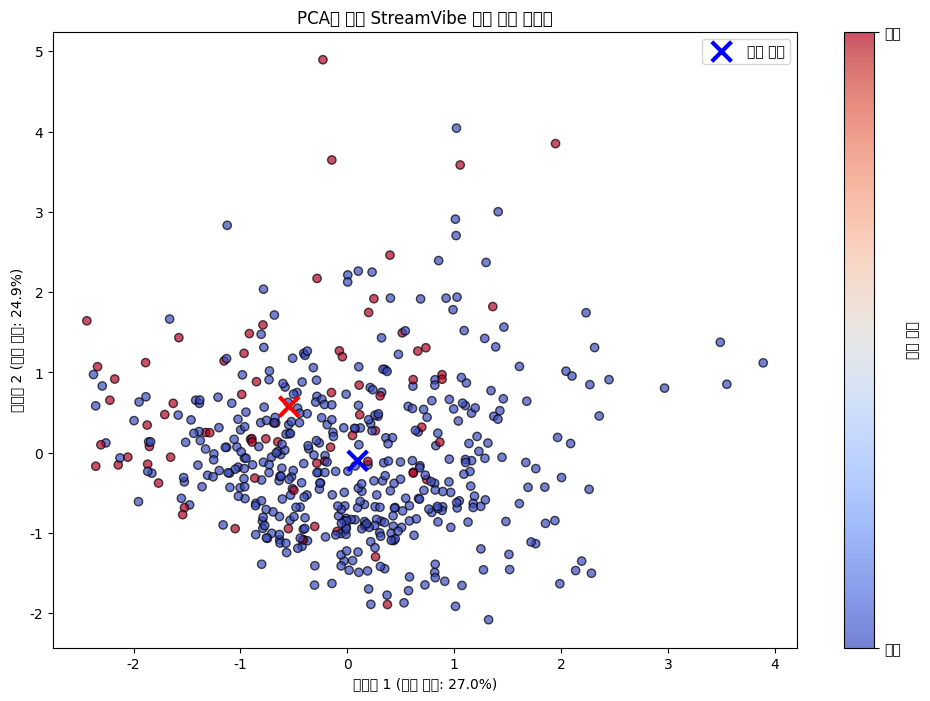

In [20]:
#3-2 PCA Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
# PCA Í≤∞Í≥ºÏóêÏÑú Ï£ºÏÑ±Î∂Ñ 1, 2 Ï∂îÏ∂ú
x_pca1 = X_pca[:, 0]
x_pca2 = X_pca[:, 1]
colors = data_streaming['churn']

# ÏÇ∞Ï†êÎèÑ: churn Í∞íÏóê Îî∞Îùº ÏÉâÏÉÅ Íµ¨Î∂Ñ
scatter = plt.scatter(
    x_pca1,
    x_pca2,
    c=colors,
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel(f'Ï£ºÏÑ±Î∂Ñ 1 (Î∂ÑÏÇ∞ ÏÑ§Î™Ö: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Ï£ºÏÑ±Î∂Ñ 2 (Î∂ÑÏÇ∞ ÏÑ§Î™Ö: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCAÎ•º ÌÜµÌïú StreamVibe Í≥†Í∞ù Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî')
cbar = plt.colorbar(scatter, label='Ïù¥ÌÉà Ïó¨Î∂Ä')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Ïú†ÏßÄ', 'Ïù¥ÌÉà'])

# Ïù¥ÌÉà/Ïú†ÏßÄ Í≥†Í∞ù Ï§ëÏã¨Ï†ê ÌëúÏãú
churn_centers = data_streaming.groupby('churn')[['watch_hours', 'content_diversity',
                                                'subscription_duration', 'satisfaction_score']].mean()
churn_centers_scaled = scaler.transform(churn_centers)
churn_centers_pca = pca.transform(churn_centers_scaled)
plt.scatter(churn_centers_pca[:, 0], churn_centers_pca[:, 1],
           c=['blue', 'red'], s=200, marker='x', linewidths=3, label='Í∑∏Î£π Ï§ëÏã¨')
plt.legend()
plt.show()

In [21]:
#3-3 Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî
kmeans = KMeans(n_clusters=3, random_state=789)
data_streaming['cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = data_streaming.groupby('cluster')[features + ['churn']].mean()

print("üìä Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏßï Î∂ÑÏÑù")
print(cluster_summary.round(2))

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÎπÑÏ¶àÎãàÏä§ Ìï¥ÏÑù
print("\nüéØ ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ± Ìï¥ÏÑù:")
for cluster_id in range(3):
    cluster_data = cluster_summary.loc[cluster_id]
    churn_rate = cluster_data['churn'] * 100

    print(f"\n[ÏÑ∏Í∑∏Î®ºÌä∏ {cluster_id}] - Ïù¥ÌÉàÎ•†: {churn_rate:.1f}%")
    print(f"  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: {cluster_data['watch_hours']:.1f}ÏãúÍ∞Ñ")
    print(f"  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: {cluster_data['content_diversity']:.1f}/10")
    print(f"  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: {cluster_data['subscription_duration']:.1f}Í∞úÏõî")
    print(f"  ‚Ä¢ ÎßåÏ°±ÎèÑ: {cluster_data['satisfaction_score']:.1f}/10")

    # Î¶¨Ïä§ÌÅ¨ Î†àÎ≤® Î∂ÑÎ•ò
    if churn_rate > 30:
        print(f"  ‚Üí üö® Í≥†ÏúÑÌóòÍµ∞ (Ï¶âÏãú ÎåÄÏùë ÌïÑÏöî)")
    elif churn_rate > 15:
        print(f"  ‚Üí ‚ö†Ô∏è Ï§ëÏúÑÌóòÍµ∞ (ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨ ÌïÑÏöî)")
    else:
        print(f"  ‚Üí ‚úÖ Ï†ÄÏúÑÌóòÍµ∞ (ÌòÑ ÏÉÅÌÉú Ïú†ÏßÄ)")

# ÏÑ∏Í∑∏Î®ºÌä∏ ÌÅ¨Í∏∞
segment_sizes = data_streaming['cluster'].value_counts().sort_index()
print(f"\nüìà ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÎ™®:")
for i, size in enumerate(segment_sizes):
    print(f"  ÏÑ∏Í∑∏Î®ºÌä∏ {i}: {size}Î™Ö ({size/len(data_streaming)*100:.1f}%)")

üìä Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏßï Î∂ÑÏÑù
         watch_hours  content_diversity  subscription_duration  \
cluster                                                          
0              10.62               7.69                   7.81   
1              13.92               5.56                  31.43   
2              10.95               3.10                   7.12   

         satisfaction_score  churn  
cluster                             
0                      7.32   0.09  
1                      7.15   0.25  
2                      6.67   0.16  

üéØ ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ± Ìï¥ÏÑù:

[ÏÑ∏Í∑∏Î®ºÌä∏ 0] - Ïù¥ÌÉàÎ•†: 9.2%
  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: 10.6ÏãúÍ∞Ñ
  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: 7.7/10
  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: 7.8Í∞úÏõî
  ‚Ä¢ ÎßåÏ°±ÎèÑ: 7.3/10
  ‚Üí ‚úÖ Ï†ÄÏúÑÌóòÍµ∞ (ÌòÑ ÏÉÅÌÉú Ïú†ÏßÄ)

[ÏÑ∏Í∑∏Î®ºÌä∏ 1] - Ïù¥ÌÉàÎ•†: 25.3%
  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: 13.9ÏãúÍ∞Ñ
  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: 5.6/10
  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: 31.4Í∞úÏõî
  ‚Ä¢ ÎßåÏ°±ÎèÑ: 7.2/10
  ‚Üí ‚ö†Ô∏è Ï§ëÏúÑÌóòÍµ∞ (ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨ Ì

In [26]:
#3-4 Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏
X_logistic = X_scaled
y_logistic = data_streaming['churn']
logistic_model = LogisticRegression(random_state=789)
# Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
logistic_model.fit(X_logistic, y_logistic)
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]
y_pred = logistic_model.predict(X_logistic)

accuracy = (y_pred == y_logistic).mean()
print(f"Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Î≥ÄÏàòÎ≥Ñ Ï§ëÏöîÎèÑ Î∂ÑÏÑù
feature_importance = pd.DataFrame({
    'Î≥ÄÏàò': features,
    'Í≥ÑÏàò': logistic_model.coef_[0],
    'Ï§ëÏöîÎèÑ': np.abs(logistic_model.coef_[0])
}).sort_values('Ï§ëÏöîÎèÑ', ascending=False)

print("\nüìä Ïù¥ÌÉà ÏòàÏ∏° Ï£ºÏöî Î≥ÄÏàò")
print(feature_importance.round(3))


# Ïù¥ÌÉà ÌôïÎ•†Î≥Ñ Í≥†Í∞ù Î∂ÑÌè¨
data_streaming['churn_probability'] = y_pred_proba
print(f"\nüéØ Ïù¥ÌÉà ÏúÑÌóòÎèÑÎ≥Ñ Í≥†Í∞ù Î∂ÑÌè¨:")
print(f"  Í≥†ÏúÑÌóò (ÌôïÎ•† > 0.7): {(y_pred_proba > 0.7).sum()}Î™Ö")
print(f"  Ï§ëÏúÑÌóò (0.3 < ÌôïÎ•† ‚â§ 0.7): {((y_pred_proba > 0.3) & (y_pred_proba <= 0.7)).sum()}Î™Ö")
print(f"  Ï†ÄÏúÑÌóò (ÌôïÎ•† ‚â§ 0.3): {(y_pred_proba <= 0.3).sum()}Î™Ö")

# Ïù¥ÌÉàÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ ÏÑ∏Í∑∏Î®ºÌä∏ ÏãùÎ≥Ñ
high_risk_cluster = cluster_summary['churn'].idxmax()

# Í≥†ÏúÑÌóò ÏÑ∏Í∑∏Î®ºÌä∏Ïùò ÌèâÍ∑† ÌäπÏÑ± Í∞ÄÏ†∏Ïò§Í∏∞
high_risk_features = cluster_summary.loc[high_risk_cluster]

# Í≥†ÏúÑÌóò ÏÑ∏Í∑∏Î®ºÌä∏Ïùò Ïù¥ÌÉàÎ•† (%)
high_risk_churn_rate = high_risk_features['churn'] * 100
# Ï§ëÏöîÎèÑ ÏÉÅÏúÑ 2Í∞ú Î≥ÄÏàò Ï∂îÏ∂ú (logistic regression Í∏∞Î∞ò)
top_features = feature_importance['Î≥ÄÏàò'].head(2).tolist()
# Ïù¥ÌÉà ÌôïÎ•†Ïù¥ 70% Ï¥àÍ≥ºÏù∏ Í≥†Í∞ù Ïàò Î∞è ÎπÑÏú®
n_high_risk = (data_streaming['churn_probability'] > 0.7).sum()
high_risk_ratio = n_high_risk / len(data_streaming) * 100
# Í≥†ÏúÑÌóò Í≥†Í∞ù Ï§ë 40%Î•º Ïú†ÏßÄÌïúÎã§Í≥† Í∞ÄÏ†ï
expected_saved = n_high_risk * 0.4

# Ïú†ÏßÄÌïú Í≥†Í∞ù 1Î™ÖÎãπ 20ÎßåÏõê Îß§Ï∂ú Î∞úÏÉù Í∞ÄÏ†ï
expected_revenue = expected_saved * 200000
# Ïú†ÏßÄÌïú Í≥†Í∞ù 1Î™ÖÎãπ ÎπÑÏö©Ïù¥ 5Îßå ÏõêÏùº Îïå, ROI = Ïù¥Ïùµ / ÎπÑÏö©
roi = (expected_revenue / (expected_saved * retention_cost_per_customer) - 1) * 100


Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.870 (87.0%)

üìä Ïù¥ÌÉà ÏòàÏ∏° Ï£ºÏöî Î≥ÄÏàò
                      Î≥ÄÏàò     Í≥ÑÏàò    Ï§ëÏöîÎèÑ
3     satisfaction_score -1.366  1.366
2  subscription_duration  0.599  0.599
0            watch_hours -0.441  0.441
1      content_diversity  0.028  0.028

üéØ Ïù¥ÌÉà ÏúÑÌóòÎèÑÎ≥Ñ Í≥†Í∞ù Î∂ÑÌè¨:
  Í≥†ÏúÑÌóò (ÌôïÎ•† > 0.7): 11Î™Ö
  Ï§ëÏúÑÌóò (0.3 < ÌôïÎ•† ‚â§ 0.7): 69Î™Ö
  Ï†ÄÏúÑÌóò (ÌôïÎ•† ‚â§ 0.3): 420Î™Ö


In [23]:
#3-5 Î™®Îç∏ ÏÑ±Îä• Î∂ÑÏÑù
cm = confusion_matrix(y_logistic, y_pred)
tn, fp, fn, tp = cm.ravel()

print("üìã Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• Î∂ÑÏÑù")
print(f"Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (True Negative): {tn}Î™Ö")
print(f"Ïù¥ÌÉàÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (False Positive): {fp}Î™Ö")
print(f"Ïú†ÏßÄÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (False Negative): {fn}Î™Ö")
print(f"Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (True Positive): {tp}Î™Ö")

# ÎπÑÏ¶àÎãàÏä§ Î©îÌä∏Î¶≠ Í≥ÑÏÇ∞
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nüéØ ÎπÑÏ¶àÎãàÏä§ ÏÑ±Í≥º ÏßÄÌëú:")
print(f"Ï†ïÎ∞ÄÎèÑ (Precision): {precision:.3f} - Ïù¥ÌÉà ÏòàÏ∏° Ï§ë Ïã§Ï†ú Ïù¥ÌÉà ÎπÑÏú®")
print(f"Ïû¨ÌòÑÏú® (Recall): {recall:.3f} - Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®")
print(f"F1-Score: {f1_score:.3f} - Ï¢ÖÌï© ÏÑ±Îä• ÏßÄÌëú")

# ÎπÑÏ¶àÎãàÏä§ ÏÜêÏã§ Î∂ÑÏÑù
retention_cost_per_customer = 50000  # Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏö© (Ïø†Ìè∞, Ìï†Ïù∏ Îì±)
lost_revenue_per_churn = 200000     # Ïù¥ÌÉà Í≥†Í∞ùÎãπ Îß§Ï∂ú ÏÜêÏã§

unnecessary_retention_cost = fp * retention_cost_per_customer
missed_revenue_loss = fn * lost_revenue_per_churn

print(f"\nüí∞ ÏòàÏÉÅ ÎπÑÏö© Î∂ÑÏÑù:")
print(f"Î∂àÌïÑÏöîÌïú Ïú†ÏßÄ ÎπÑÏö© (False Positive): {unnecessary_retention_cost:,}Ïõê")
print(f"ÎÜìÏπú Ïù¥ÌÉàÎ°ú Ïù∏Ìïú ÏÜêÏã§ (False Negative): {missed_revenue_loss:,}Ïõê")
print(f"Ï¥ù ÏòàÏÉÅ ÏÜêÏã§: {unnecessary_retention_cost + missed_revenue_loss:,}Ïõê")

üìã Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• Î∂ÑÏÑù
Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (True Negative): 414Î™Ö
Ïù¥ÌÉàÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (False Positive): 11Î™Ö
Ïú†ÏßÄÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (False Negative): 54Î™Ö
Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (True Positive): 21Î™Ö

üéØ ÎπÑÏ¶àÎãàÏä§ ÏÑ±Í≥º ÏßÄÌëú:
Ï†ïÎ∞ÄÎèÑ (Precision): 0.656 - Ïù¥ÌÉà ÏòàÏ∏° Ï§ë Ïã§Ï†ú Ïù¥ÌÉà ÎπÑÏú®
Ïû¨ÌòÑÏú® (Recall): 0.280 - Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®
F1-Score: 0.393 - Ï¢ÖÌï© ÏÑ±Îä• ÏßÄÌëú

üí∞ ÏòàÏÉÅ ÎπÑÏö© Î∂ÑÏÑù:
Î∂àÌïÑÏöîÌïú Ïú†ÏßÄ ÎπÑÏö© (False Positive): 550,000Ïõê
ÎÜìÏπú Ïù¥ÌÉàÎ°ú Ïù∏Ìïú ÏÜêÏã§ (False Negative): 10,800,000Ïõê
Ï¥ù ÏòàÏÉÅ ÏÜêÏã§: 11,350,000Ïõê


In [24]:
#3-6 roc Í≥°ÏÑ†Í≥º auc
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_logistic, y_pred_proba)
roc_auc = roc_auc_score(y_logistic, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'StreamVibe Î™®Îç∏ (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='ÎûúÎç§ Î∂ÑÎ•òÍ∏∞ (AUC = 0.500)')
plt.xlabel('ÏúÑÏñëÏÑ±Î•† (False Positive Rate)')
plt.ylabel('ÎØºÍ∞êÎèÑ (True Positive Rate)')
plt.title('StreamVibe Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ROC Í≥°ÏÑ†')
plt.legend()
plt.grid(True, alpha=0.3)

# AUC ÏÑ±Îä• Ìï¥ÏÑù
if roc_auc > 0.9:
    performance_level = "ÌÉÅÏõîÌï® (ÏóÖÍ≥Ñ ÏµúÍ≥† ÏàòÏ§Ä)"
elif roc_auc > 0.8:
    performance_level = "Ïö∞ÏàòÌï® (ÏÉÅÏö©Ìôî Í∞ÄÎä• ÏàòÏ§Ä)"
elif roc_auc > 0.7:
    performance_level = "ÏñëÌò∏Ìï® (Í∞úÏÑ† Ïó¨ÏßÄ ÏûàÏùå)"
else:
    performance_level = "Î∂ÄÏ°±Ìï® (Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî)"

print(f"üìä AUC ÏÑ±Îä• ÌèâÍ∞Ä: {roc_auc:.3f} ‚Üí {performance_level}")
plt.show()

# ÏµúÏ†Å ÏûÑÍ≥ÑÍ∞í Ï∞æÍ∏∞
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"üéØ ÏµúÏ†Å ÏòàÏ∏° ÏûÑÍ≥ÑÍ∞í: {optimal_threshold:.3f}")
print(f"   Ïù¥ ÏûÑÍ≥ÑÍ∞íÏóêÏÑú ÎØºÍ∞êÎèÑ: {tpr[optimal_idx]:.3f}, ÌäπÏù¥ÎèÑ: {1-fpr[optimal_idx]:.3f}")

üìä AUC ÏÑ±Îä• ÌèâÍ∞Ä: 0.851 ‚Üí Ïö∞ÏàòÌï® (ÏÉÅÏö©Ìôî Í∞ÄÎä• ÏàòÏ§Ä)


üéØ ÏµúÏ†Å ÏòàÏ∏° ÏûÑÍ≥ÑÍ∞í: 0.165
   Ïù¥ ÏûÑÍ≥ÑÍ∞íÏóêÏÑú ÎØºÍ∞êÎèÑ: 0.760, ÌäπÏù¥ÎèÑ: 0.798


In [25]:
#3-7 Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú
report = f"""
üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: StreamVibe Í≥†Í∞ù Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ
==================================================

üö® ÌòÑÏû¨ ÏÉÅÌô©
‚Ä¢ Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: {data_streaming['churn'].mean()*100:.1f}%
‚Ä¢ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ïàò: {data_streaming['cluster'].nunique()}Í∞ú
‚Ä¢ Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ AUC: {roc_auc:.3f}
‚Ä¢ Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy*100:.1f}%

üéØ ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠
1. Í≥†ÏúÑÌóò ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ±: ÏãúÏ≤≠ÏãúÍ∞Ñ {high_risk_features['watch_hours']:.1f}ÏãúÍ∞Ñ, ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± {high_risk_features['content_diversity']:.1f}, Íµ¨ÎèÖÍ∏∞Í∞Ñ {high_risk_features['subscription_duration']:.1f}Í∞úÏõî, ÎßåÏ°±ÎèÑ {high_risk_features['satisfaction_score']:.1f}/10
2. Ïù¥ÌÉà Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàò: {", ".join(top_features)}
3. ÏòàÏ∏° Í∞ÄÎä•Ìïú Ïù¥ÌÉà Í≥†Í∞ù: {n_high_risk:,}Î™Ö ({high_risk_ratio:.1f}%)

üí° Ï¶âÏãú Ïã§Ìñâ Í∞ÄÎä•Ìïú ÎåÄÏùë Ï†ÑÎûµ
1. ÏÑ†Ï†úÏ†Å Í≥†Í∞ù Ïú†ÏßÄ: Í≥†ÏúÑÌóò Í≥†Í∞ù ÎåÄÏÉÅ Ïù¥ÌÉà ÌôïÎ•† Í∏∞Î∞ò ÏïåÎ¶º Î∞úÏÜ° Î∞è 1:1 ÌòúÌÉù Ï†úÏïà (Ïø†Ìè∞, ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏΩòÌÖêÏ∏† Ï†úÍ≥µ Îì±)
2. ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÎßûÏ∂§ Ï†ÑÎûµ: Ï§ëÏúÑÌóòÍµ∞Ïóî Î¶¨ÌÖêÏÖò Ï∫†ÌéòÏù∏ Ï†úÍ≥µ, Ï†ÄÏúÑÌóòÍµ∞Ïóî Ïû•Í∏∞ Íµ¨ÎèÖ Ïú†ÎèÑ ÌîÑÎ°úÎ™®ÏÖò ÏÑ§Í≥Ñ
3. ÏΩòÌÖêÏ∏† Ï†ÑÎûµ Í∞úÏÑ†: Í≥†ÏúÑÌóòÍµ∞Ïùò ÎÇÆÏùÄ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Í∞ïÌôî Î∞è ÎßûÏ∂§Ìòï ÌÅêÎ†àÏù¥ÏÖò ÏΩòÌÖêÏ∏† Í∞úÎ∞ú

üìà ÏòàÏÉÅ Ìö®Í≥º
‚Ä¢ Ïù¥ÌÉàÎ•† Í∞êÏÜå Î™©Ìëú: {high_risk_churn_rate:.1f}% ‚Üí {high_risk_churn_rate*0.8:.1f}% (20% Í∞êÏÜå Î™©Ìëú)
‚Ä¢ ÏòàÏÉÅ Îß§Ï∂ú ÌöåÎ≥µ: {expected_revenue:,.0f}Ïõê
‚Ä¢ ROI: {roi:.1f}%

‚è∞ Ïã§Ìñâ ÏùºÏ†ï (Ìñ•ÌõÑ 3Í∞úÏõî)
‚Ä¢ 1Ï£ºÏ∞®: Í≥†ÏúÑÌóòÍµ∞ Ï∂îÏ∂ú Î∞è Í∞úÏù∏Ìôî Ïú†ÏßÄ Ï∫†ÌéòÏù∏ ÏÑ§Í≥Ñ
‚Ä¢ 2~3Ï£ºÏ∞®: Ï∫†ÌéòÏù∏ Î∞∞Ìè¨ Î∞è Í≥†Í∞ù Î∞òÏùë Ïã§ÏãúÍ∞Ñ Î™®ÎãàÌÑ∞ÎßÅ
‚Ä¢ 2Í∞úÏõîÏ∞®: ÏΩòÌÖêÏ∏† ÌÅêÎ†àÏù¥ÏÖò ÏïåÍ≥†Î¶¨Ï¶ò Í∞úÏÑ† Î∞è Ï∂îÏ≤ú Í≥†ÎèÑÌôî
‚Ä¢ 3Í∞úÏõîÏ∞®: Ï†ÑÎûµ ÌèâÍ∞Ä Î∞è ROI Î∂ÑÏÑù, Ïû•Í∏∞Ìôî Ï†ÑÎûµ ÏàòÎ¶Ω

üîß ÌïÑÏöî Î¶¨ÏÜåÏä§
‚Ä¢ Ïù∏Î†•: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞Ä 1Î™Ö, ÎßàÏºÄÌåÖ Í∏∞ÌöçÏûê 1Î™Ö, CRM Ïö¥ÏòÅÏûê 1Î™Ö
‚Ä¢ ÏòàÏÇ∞: ÏïΩ 500ÎßåÏõê (Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏö©, Ï∫†ÌéòÏù∏ Ïö¥ÏòÅ Ìè¨Ìï®)
‚Ä¢ ÏãúÏä§ÌÖú: Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ Ïö¥ÏòÅÏùÑ ÏúÑÌïú ÏûêÎèôÌôî Ìà¥, Í≥†Í∞ù Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò ÌîåÎû´Ìèº
"""

print(report)


üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: StreamVibe Í≥†Í∞ù Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ

üö® ÌòÑÏû¨ ÏÉÅÌô©
‚Ä¢ Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: 15.0%
‚Ä¢ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ïàò: 3Í∞ú
‚Ä¢ Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ AUC: 0.851
‚Ä¢ Î™®Îç∏ Ï†ïÌôïÎèÑ: 87.0%

üéØ ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠
1. Í≥†ÏúÑÌóò ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ±: ÏãúÏ≤≠ÏãúÍ∞Ñ 13.9ÏãúÍ∞Ñ, ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± 5.6, Íµ¨ÎèÖÍ∏∞Í∞Ñ 31.4Í∞úÏõî, ÎßåÏ°±ÎèÑ 7.2/10
2. Ïù¥ÌÉà Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàò: satisfaction_score, subscription_duration
3. ÏòàÏ∏° Í∞ÄÎä•Ìïú Ïù¥ÌÉà Í≥†Í∞ù: 11Î™Ö (2.2%)

üí° Ï¶âÏãú Ïã§Ìñâ Í∞ÄÎä•Ìïú ÎåÄÏùë Ï†ÑÎûµ
1. ÏÑ†Ï†úÏ†Å Í≥†Í∞ù Ïú†ÏßÄ: Í≥†ÏúÑÌóò Í≥†Í∞ù ÎåÄÏÉÅ Ïù¥ÌÉà ÌôïÎ•† Í∏∞Î∞ò ÏïåÎ¶º Î∞úÏÜ° Î∞è 1:1 ÌòúÌÉù Ï†úÏïà (Ïø†Ìè∞, ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏΩòÌÖêÏ∏† Ï†úÍ≥µ Îì±)
2. ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÎßûÏ∂§ Ï†ÑÎûµ: Ï§ëÏúÑÌóòÍµ∞Ïóî Î¶¨ÌÖêÏÖò Ï∫†ÌéòÏù∏ Ï†úÍ≥µ, Ï†ÄÏúÑÌóòÍµ∞Ïóî Ïû•Í∏∞ Íµ¨ÎèÖ Ïú†ÎèÑ ÌîÑÎ°úÎ™®ÏÖò ÏÑ§Í≥Ñ
3. ÏΩòÌÖêÏ∏† Ï†ÑÎûµ Í∞úÏÑ†: Í≥†ÏúÑÌóòÍµ∞Ïùò ÎÇÆÏùÄ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Í∞ïÌôî Î∞è ÎßûÏ∂§Ìòï ÌÅêÎ†àÏù¥ÏÖò ÏΩòÌÖêÏ∏† Í∞úÎ∞ú

üìà ÏòàÏÉÅ Ìö®Í≥º
‚Ä¢